# Python for Data Science L1 Assignment 
###                 - Harsh Dhaundiyal

## 1&2. Movie Lens data problem

In [100]:
import os

os.chdir('E:\Datasets\ml-1m')

In [101]:
import pandas as pd

movie = pd.read_csv('movies.csv', sep="::", names=['mId', 'mTitle', 'mGenre'])
print( movie.shape )
movie.head()

(3883, 3)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,mId,mTitle,mGenre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [102]:
user = pd.read_csv('users.csv', sep="::", names=['uId', 'uGender', 'uAge', 'uOccupation', 'zipcode'])
'''
- Age is chosen from the following ranges:

*  1:  "Under 18"
* 18:  "18-24"
* 25:  "25-34"
* 35:  "35-44"
* 45:  "45-49"
* 50:  "50-55"
* 56:  "56+"
'''

print( user.shape )
user.head()

(6040, 5)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,uId,uGender,uAge,uOccupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [103]:
rating = pd.read_csv('ratings.csv', sep="::", names=['uId', 'mId', 'rating', 'timestamp'], encoding='utf-8')
print( rating.shape )
rating.head()

#- Timestamp is represented in seconds since the epoch as returned by time(2)
#- Each user has at least 20 ratings
# - Ratings are made on a 5-star scale (whole-star ratings only)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


(1000209, 4)


,uId,mId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### 1. Do a merge of all the three files movies.csv, users.csv and ratings.csv in an appropriate way as one csv file namely movies_integrated.csv by using a common column id present in each data file

In [104]:
# (Movies - Ratings) - Users
# Merging movie and rating dataframe

result1 = pd.merge(rating, movie, on='mId')
print( result1.shape )
result1.head()

(1000209, 6)


,uId,mId,rating,timestamp,mTitle,mGenre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [105]:
# Merge1 - Users
# Merging result1 and user dataframe

movies_integrated = pd.merge(result1, user, on='uId')
print( movies_integrated.shape )
movies_integrated.head()

(1000209, 10)


,uId,mId,rating,timestamp,mTitle,mGenre,uGender,uAge,uOccupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [106]:
movies_integrated.set_index('timestamp', inplace=True)
movies_integrated.head()

,uId,mId,rating,mTitle,mGenre,uGender,uAge,uOccupation,zipcode
timestamp,,,,,,,,,
978300760,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
978302109,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
978301968,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10,48067
978300275,1,3408,4,Erin Brockovich (2000),Drama,F,1,10,48067
978824291,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


### 2. Use that merged file to find if there is any difference in the way ladies and gentlemen rate the movies.<br> If there is a difference in rating between genders, then show it in your data analysis and also through data visualization

In [107]:
data = movies_integrated.copy()

In [108]:
data.shape

(1000209, 9)

In [109]:
print( type(data['rating'].iloc[0]) )
data.rating.describe()

<class 'numpy.int64'>


count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [110]:
# Ratings by a Man
data[ data['uGender'] == 'M' ]['rating'].describe()

count    753769.000000
mean          3.568879
std           1.118724
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [111]:
# Ratings by a Woman
data[ data['uGender'] == 'F' ]['rating'].describe()

count    246440.000000
mean          3.620366
std           1.111228
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

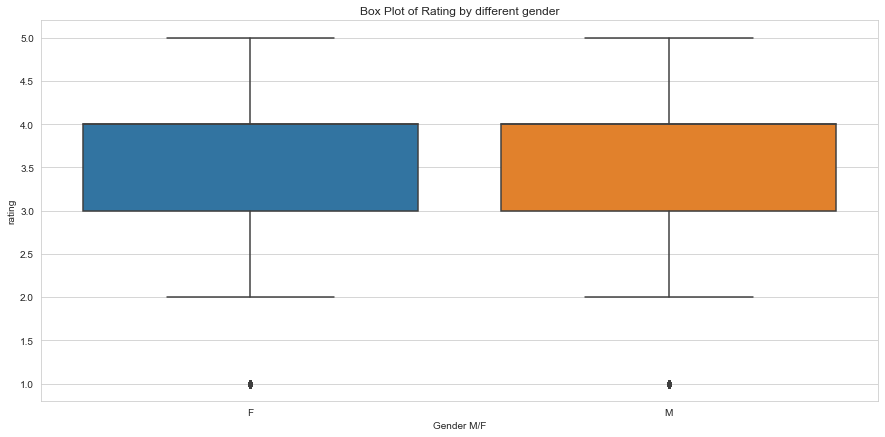

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure( figsize=(15,7) )
ax = sns.boxplot(x="uGender", y="rating", data=data, linewidth=1.5)
plt.title('Box Plot of Rating by different gender')
plt.xlabel('Gender M/F')
plt.show()

Since the movie rated by users could be rare too i,e; A movie could be rated by a very few fraction of people or even just one or two 

In that case we shouldn't consider the movie to compare ratings bw ladies and gentlemen

Let's take 200 user ratings as a threshold here to eliminate movies with fewer ratings

In [159]:
totalRating = data.groupby('mTitle')
print( len(list(totalRating)) )
list(totalRating)[:2]

3706


[('$1,000,000 Duck (1971)',
               uId   mId  rating                  mTitle             mGenre  \
  timestamp                                                                   
  976867230    216  2031       2  $1,000,000 Duck (1971)  Children's|Comedy   
  999376619    869  2031       1  $1,000,000 Duck (1971)  Children's|Comedy   
  974919045   1111  2031       5  $1,000,000 Duck (1971)  Children's|Comedy   
  974996980   1556  2031       3  $1,000,000 Duck (1971)  Children's|Comedy   
  974838218   1680  2031       3  $1,000,000 Duck (1971)  Children's|Comedy   
  1012858238  1748  2031       1  $1,000,000 Duck (1971)  Children's|Comedy   
  974855061   1941  2031       4  $1,000,000 Duck (1971)  Children's|Comedy   
  1019110546  1980  2031       3  $1,000,000 Duck (1971)  Children's|Comedy   
  974679154   1998  2031       3  $1,000,000 Duck (1971)  Children's|Comedy   
  974746245   2030  2031       2  $1,000,000 Duck (1971)  Children's|Comedy   
  1038194385  2462  2031

In [160]:
totalRating = data.groupby('mTitle').size()
totalRating

mTitle
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [161]:
trueRatings = totalRating.index[totalRating >= 200]
trueRatings

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'Year of Living Dangerously (1982)', 'Yellow Submarine (1968)',
       'Yojimbo (1961)', 'You've Got Mail (1998)', 'Young Frankenstein (1974)',
       'Young Guns (1988)', 'Young Guns II (1990)',
       'Young Sherlock Holmes (1985)', 'Zero Effect (1998)',
       'eXistenZ (1999)'],
      dtype='object', name='mTitle', length=1426)

In [163]:
print(' Total Movies :',data['mTitle'].unique().shape[0] )
print(' Movies we took with user ratings > 200 :', len(trueRatings))
print(' Rejected movies with < 200 user ratings :', data['mTitle'].unique().shape[0] - len(trueRatings) )

 Total Movies : 3706
 Movies we took with user ratings > 200 : 1426
 Rejected movies with < 200 user ratings : 2280


In [164]:
# Taking average of all the movie user ratings and splitting them based on Gender

avgRating = data.pivot_table('rating', index='mTitle', columns='uGender')
avgRating[:5]

uGender,F,M
mTitle,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [166]:
# Now only selecting > 200 user rated movies

avgRating200 = avgRating.loc[trueRatings]
print(avgRating200.shape)
avgRating200.head()

(1426, 2)


uGender,F,M
mTitle,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


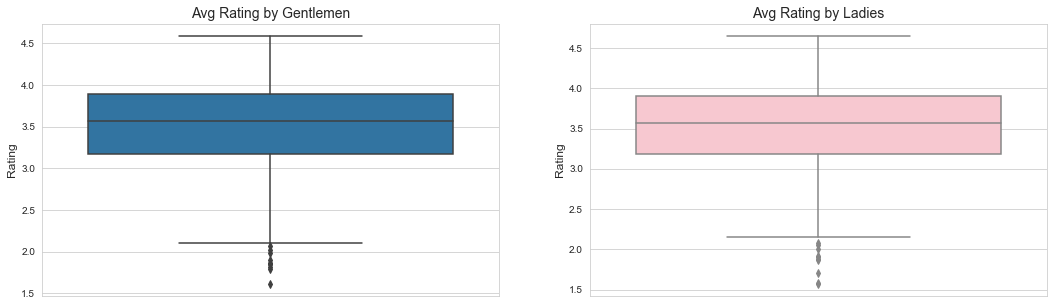

In [188]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1 = sns.boxplot( y="M", data=avgRating200, linewidth=1.5, ax=ax1)
ax2 = sns.boxplot( y="F", data=avgRating200, linewidth=1.5, ax=ax2, color='pink')
ax1.set_title('Avg Rating by Gentlemen', size=14)
ax2.set_title('Avg Rating by Ladies', size=14)

ax1.set_ylabel('Rating',size=12)
ax2.set_ylabel('Rating',size=12)

plt.show()

In [167]:
# Now we have the avg user rating for differnt movies rated by > 200 users, splitted gender wise

print(' Average ratings given by M overall :', avgRating200['M'].mean() )
print(' Average ratings given by F overall :', avgRating200['F'].mean() )

 Average ratings given by M overall : 3.504311777742739
 Average ratings given by F overall : 3.515640251529378


In [168]:
avgRating200['diff'] = avgRating200['M'] - avgRating200['F']
avgRating200.sort_values(by='diff', inplace=True)
avgRating200

uGender,F,M,diff
mTitle,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",3.486842,2.795276,-0.691567
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
"Relic, The (1997)",3.309524,2.723077,-0.586447
...,...,...,...
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Up in Smoke (1978),2.944444,3.585227,0.640783


In [169]:
avgRating200['diff'].describe()

count    1426.000000
mean       -0.011328
std         0.212422
min        -0.830782
25%        -0.145018
50%        -0.013975
75%         0.114081
max         0.726351
Name: diff, dtype: float64

In [170]:
print(' No. of movies in which M rated more than F :',avgRating200[avgRating200['diff']>0].shape[0] )
print(' No. of movies in which F rated more than M :',avgRating200[avgRating200['diff']<0].shape[0] )

 No. of movies in which M rated more than F : 680
 No. of movies in which F rated more than M : 746


From the above analysis we see that although there is a difference but it's not that significant

Therefore we can conclude there is no big diff. in Ladies and Gentleman rating a movie

## 4. Data analysis and classification done on the USA university admission data 

In [189]:
import os

os.chdir('C:\\Users\\Harsh\\Downloads')

In [192]:
import pandas as pd
filename = "UniversityAdmissions.xlsx"

data = pd.read_excel(filename , names=['admit', 'gre', 'gpa', 'prestige'])
data.head()

,admit,gre,gpa,prestige
0,1,660,3.67,good
1,1,800,4.00,best
2,1,640,3.19,ok
3,0,520,2.93,ok
4,1,760,3.00,veryGood


In [3]:
data.admit.value_counts()

0    207
1     92
Name: admit, dtype: int64

In [54]:
data.prestige.value_counts()

veryGood    107
good         91
ok           56
best         45
Name: prestige, dtype: int64

In [60]:
print( data[ data.admit == 1]['prestige'].value_counts() )
print('-'*50)
print( data[ data.admit == 0]['prestige'].value_counts() )

veryGood    39
best        25
good        19
ok           9
Name: prestige, dtype: int64
--------------------------------------------------
good        72
veryGood    68
ok          47
best        20
Name: prestige, dtype: int64


In [16]:
print('Distribution of Unselected Applicants i.e; admit=0')
print( data[ data.admit == 0 ]['gpa'].describe() )
print('-'*50)
print('Distribution of Selected Applicants i.e; admit=1')
print( data[ data.admit == 1 ]['gpa'].describe() )

Distribution of Unselected Applicants i.e; admit=0
count    207.000000
mean       3.335266
std        0.377894
min        2.260000
25%        3.075000
50%        3.330000
75%        3.590000
max        4.000000
Name: gpa, dtype: float64
--------------------------------------------------
Distribution of Selected Applicants i.e; admit=1
count    92.000000
mean      3.498478
std       0.345387
min       2.670000
25%       3.227500
50%       3.535000
75%       3.740000
max       4.000000
Name: gpa, dtype: float64


In [17]:
print('Distribution of Unselected Applicants i.e; admit=0')
print( data[ data.admit == 0 ]['gre'].describe() )
print('-'*50)
print('Distribution of Selected Applicants i.e; admit=1')
print( data[ data.admit == 1 ]['gre'].describe() )

Distribution of Unselected Applicants i.e; admit=0
count    207.000000
mean     574.396135
std      120.062676
min      300.000000
25%      500.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64
--------------------------------------------------
Distribution of Selected Applicants i.e; admit=1
count     92.000000
mean     630.217391
std      101.136164
min      400.000000
25%      555.000000
50%      620.000000
75%      700.000000
max      800.000000
Name: gre, dtype: float64


	Distribution of GRE and GPA scores


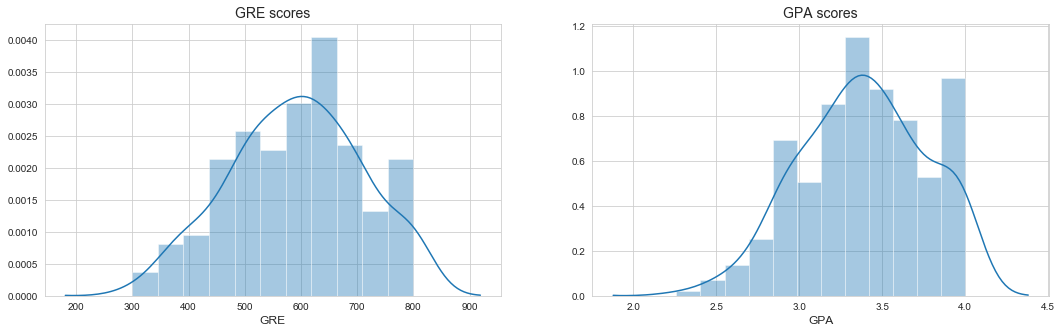

In [50]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1 = sns.distplot(data['gre'], ax=ax1);
ax2 = sns.distplot(data['gpa'], ax=ax2);
ax1.set_title('GRE scores', size=14)
ax2.set_title('GPA scores', size=14)
ax1.set_xlabel('GRE',size=12)
ax2.set_xlabel('GPA',size=12)

print('\tDistribution of GRE and GPA scores')
plt.show()

In [61]:
# Mean GPA scores of different admits along with their prestige

data.pivot_table('gpa', index='admit', columns='prestige')

prestige,best,good,ok,veryGood
admit,,,,
0,3.3005,3.417639,3.285319,3.292794
1,3.6252,3.561579,3.367778,3.416667


In [62]:
# Mean GRE scores of different admits along with their prestige

data.pivot_table('gre', index='admit', columns='prestige')

prestige,best,good,ok,veryGood
admit,,,,
0,588.0,567.500000,567.234043,582.647059
1,646.4,633.684211,606.666667,623.589744


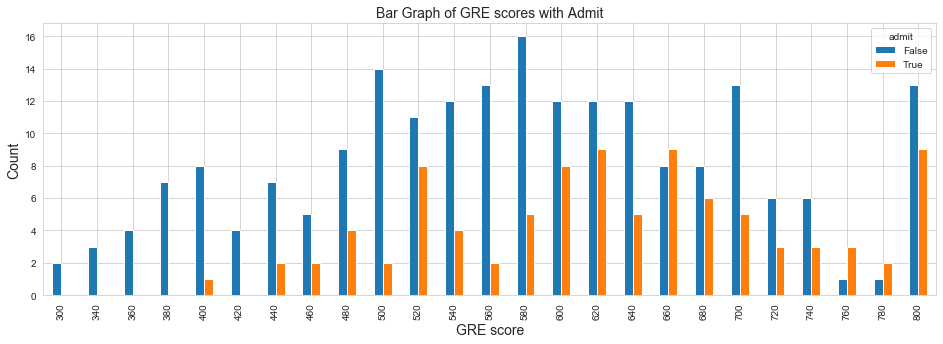

In [73]:
pd.crosstab( data['gre'], data['admit'].astype(bool)).plot(kind='bar', figsize=(16,5))
plt.title('Bar Graph of GRE scores with Admit', size=14)
plt.xlabel('GRE score', size=14)
plt.ylabel('Count', size=14)
plt.show()

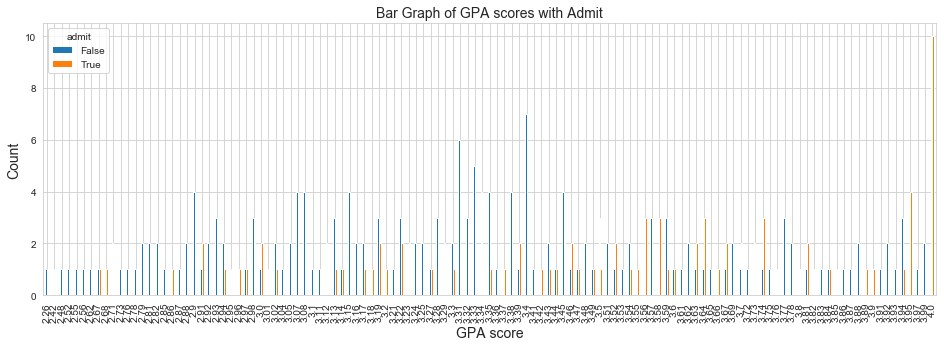

In [78]:
pd.crosstab( data['gpa'], data['admit'].astype(bool)).plot(kind='bar', figsize=(16,5))
plt.title('Bar Graph of GPA scores with Admit', size=14)
plt.xlabel('GPA score', size=14)
plt.ylabel('Count', size=14)
plt.show()

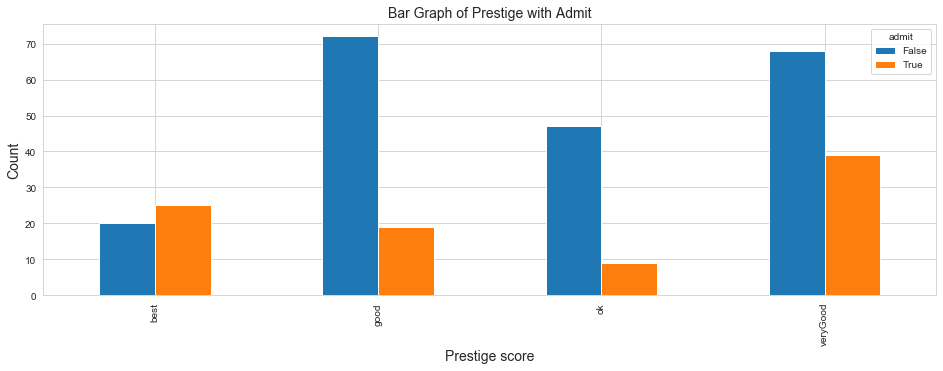

In [79]:
pd.crosstab( data['prestige'], data['admit'].astype(bool)).plot(kind='bar', figsize=(16,5))
plt.title('Bar Graph of Prestige with Admit', size=14)
plt.xlabel('Prestige score', size=14)
plt.ylabel('Count', size=14)
plt.show()

In [256]:
# Mean GRE and GPA scores of different Prestige

temp = data.groupby(["prestige"]).mean().sort_values("gre", ascending=False)
temp[['gre', 'gpa']]

,gre,gpa
prestige,,
best,620.444444,3.480889
veryGood,597.570093,3.337944
good,581.318681,3.447692
ok,573.571429,3.298571


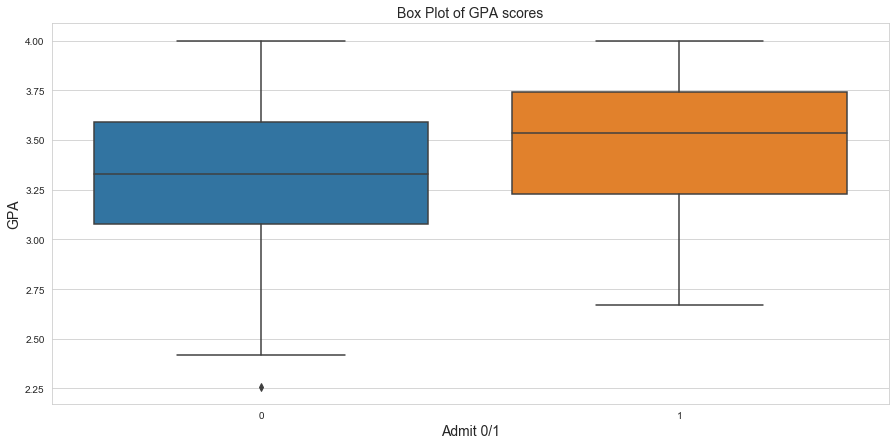

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure( figsize=(15,7) )
ax = sns.boxplot(x="admit", y="gpa", data=data, linewidth=1.5)
plt.title('Box Plot of GPA scores', size=14)
plt.xlabel('Admit 0/1', size=14)
plt.ylabel('GPA', size=14)

plt.show()

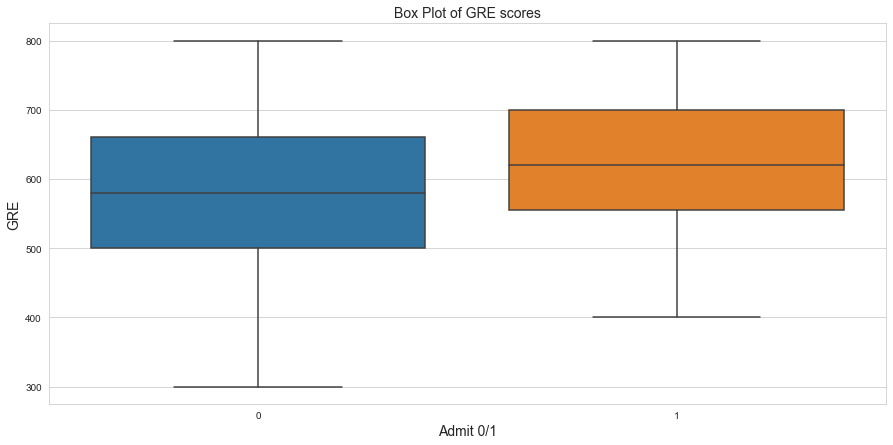

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure( figsize=(15,7) )
ax = sns.boxplot(x="admit", y="gre", data=data, linewidth=1.5)
plt.title('Box Plot of GRE scores', size=14)
plt.xlabel('Admit 0/1', size=14)
plt.ylabel('GRE', size=14)

plt.show()

### 4. Build a prediction model using logistic regression algorithm to predict if the applicant will get admission or not

In [194]:
y = data['admit']
x = data.drop(['admit'], axis=1)

print(x.shape)
print(y.shape)

(299, 3)
(299,)


In [199]:
# Spliting into Test and Train Data

from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split( x, y, test_size = 0.33, stratify = y) 

print(xtr.shape)
print(xte.shape)

(200, 3)
(99, 3)


In [200]:
# We have a Unbalanced class/ target our initial model may be biased

print( ytr.value_counts() )
print( yte.value_counts() )

0    138
1     62
Name: admit, dtype: int64
0    69
1    30
Name: admit, dtype: int64


In [201]:
# Encoding Categorical Features 

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

vectorizer.fit( xtr['prestige'].values )

xtrPres = vectorizer.transform( xtr['prestige'].values )
xtePres = vectorizer.transform( xte['prestige'].values )

print( xtrPres.shape )
print( xtePres.shape )

(200, 4)
(99, 4)


In [202]:
vectorizer.get_feature_names()

['best', 'good', 'ok', 'verygood']

In [206]:
import numpy as np
np.array(xtrPres[0])

array(<1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>, dtype=object)

In [239]:
# Scaling Numerical Features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit( xtr['gre'].values.reshape(-1, 1) )
xtrGRE = scaler.transform( xtr['gre'].values.reshape(-1, 1) )
xteGRE = scaler.transform( xte['gre'].values.reshape(-1, 1) )

print( xtrGRE.shape )
print( xteGRE.shape )

(200, 1)
(99, 1)


In [240]:
print( xtrGRE[:5] )
print( xtr['gre'][:5].values )

[[ 1.75957687]
 [ 0.07738101]
 [ 0.91847894]
 [-0.76371692]
 [ 0.07738101]]
[800 600 700 500 600]


In [241]:
# Scaling Numerical Features 

scaler = StandardScaler()

scaler.fit( xtr['gpa'].values.reshape(-1, 1) )
xtrGPA = scaler.transform( xtr['gpa'].values.reshape(-1, 1) )
xteGPA = scaler.transform( xte['gpa'].values.reshape(-1, 1) )

print( xtrGPA.shape )
print( xteGPA.shape )

(200, 1)
(99, 1)


In [242]:
print( xtrGPA[:5] )
print( xtr['gpa'][:5].values )

[[ 1.31105255]
 [ 0.58276227]
 [ 1.12897998]
 [-1.78418112]
 [ 0.37467934]]
[3.9  3.62 3.83 2.71 3.54]


In [243]:
# Merging the data together after Processing

from scipy.sparse import hstack

xtr1 = hstack(( xtrGRE, xtrGPA, xtrPres )).tocsr()
xte1 = hstack(( xteGRE, xteGPA, xtePres )).tocsr()

print( xtr1.shape, ytr.shape )
print( xte1.shape, yte.shape )

(200, 6) (200,)
(99, 6) (99,)


In [249]:
# Doing Hyperparameter Tuning and CV using GridSearchCV()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import GridSearchCV


tuned_parameters = [{'C':[ 10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 100, 1000 ]  }]


clf = GridSearchCV( LogisticRegression(), tuned_parameters, cv=15, scoring='f1', n_jobs = -1)
clf.fit(xtr1, ytr)

print("Best parameters :",clf.best_params_)
print("\nGrid scores :")
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip( means, stds, clf.cv_results_['params'] ):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

Best parameters : {'C': 10}

Grid scores :

0.000 (+/-0.000) for {'C': 1e-05}
0.000 (+/-0.000) for {'C': 0.0001}
0.000 (+/-0.000) for {'C': 0.001}
0.000 (+/-0.000) for {'C': 0.01}
0.194 (+/-0.372) for {'C': 0.1}
0.345 (+/-0.340) for {'C': 1}
0.367 (+/-0.335) for {'C': 10}
0.367 (+/-0.335) for {'C': 100}
0.367 (+/-0.335) for {'C': 1000}



In [245]:
# Finalising the model and checking on Test Data

model = LogisticRegression( C = 10 )
model.fit(xtr1, ytr)

pte = model.predict( xte1 ) 
ptr = model.predict( xtr1 ) 

# print classification report 
print(classification_report( yte, pte, target_names=['Not Accepted =>', 'Accepted =>']) ) 

                 precision    recall  f1-score   support

Not Accepted =>       0.75      0.94      0.83        69
    Accepted =>       0.67      0.27      0.38        30

       accuracy                           0.74        99
      macro avg       0.71      0.60      0.61        99
   weighted avg       0.72      0.74      0.70        99



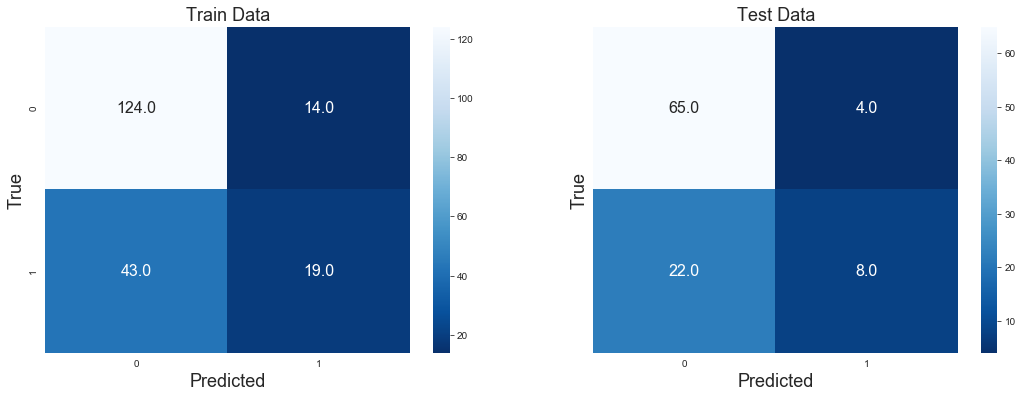

In [246]:
# Plotting the Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sn

figure,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (18,6))

g1 = sn.heatmap(confusion_matrix( ytr, ptr ), annot=True,annot_kws={"size": 16}, cmap='Blues_r', ax=ax1,fmt=".1f")# font size\
g1.set_ylabel('True',size=18)
g1.set_xlabel('Predicted',size=18)
g1.set_title('Train Data',size=18)

g2 = sn.heatmap(confusion_matrix( yte, pte ), annot=True,annot_kws={"size": 16}, cmap='Blues_r', ax=ax2,fmt=".1f")
g2.set_title('Test Data',size=18)
g2.set_ylabel('True',size=18)
g2.set_xlabel('Predicted',size=18)

plt.show()

As we can see that our model is not performing great and is also biased towards class 0 

In [252]:
# Using SMOTE to create a synthetic balanced test dataset ( Oversampling )

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 

xdata, ydata = sm.fit_sample( xtr1, ytr.ravel() ) 
    
print('After OverSampling, the shape of xtr:', xdata.shape) 
print('After OverSampling, the shape of ytr:', ydata.shape) 

print("After OverSampling, counts of label '1':", sum(ydata == 1) ) 
print("After OverSampling, counts of label '0':", sum(ydata == 0) ) 

After OverSampling, the shape of xtr: (276, 6)
After OverSampling, the shape of ytr: (276,)
After OverSampling, counts of label '1': 138
After OverSampling, counts of label '0': 138


In [253]:
# Doing Hyperparameter Tuning and CV using GridSearchCV()

tuned_parameters = [{'C':[ 10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 100, 1000 ]  }]


clf = GridSearchCV( LogisticRegression(), tuned_parameters, cv=15, scoring='f1', n_jobs = -1)
clf.fit(xdata, ydata)

print("Best parameters :",clf.best_params_)
print("\nGrid scores :")
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip( means, stds, clf.cv_results_['params'] ):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

Best parameters : {'C': 10}

Grid scores :

0.521 (+/-0.538) for {'C': 1e-05}
0.528 (+/-0.545) for {'C': 0.0001}
0.644 (+/-0.157) for {'C': 0.001}
0.639 (+/-0.166) for {'C': 0.01}
0.684 (+/-0.160) for {'C': 0.1}
0.699 (+/-0.211) for {'C': 1}
0.705 (+/-0.204) for {'C': 10}
0.705 (+/-0.204) for {'C': 100}
0.705 (+/-0.204) for {'C': 1000}



In [254]:
# Finalising the model and checking on Test Data

model = LogisticRegression( C = 10 )
model.fit(xdata, ydata)

pte = model.predict( xte1 ) 
ptr = model.predict( xdata ) 

# print classification report 
print(classification_report( yte, pte, target_names=['Not Accepted =>', 'Accepted =>']) ) 

                 precision    recall  f1-score   support

Not Accepted =>       0.77      0.68      0.72        69
    Accepted =>       0.42      0.53      0.47        30

       accuracy                           0.64        99
      macro avg       0.60      0.61      0.60        99
   weighted avg       0.66      0.64      0.65        99



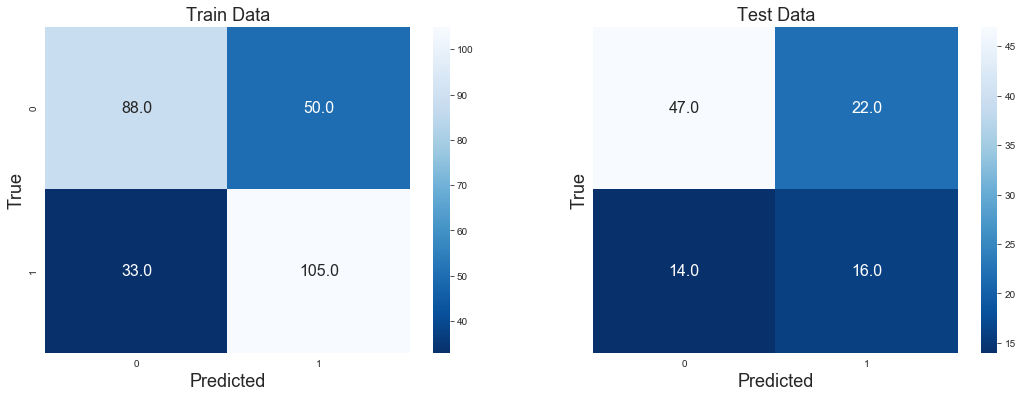

In [255]:
# Plotting the Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sn

figure,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (18,6))

g1 = sn.heatmap(confusion_matrix( ydata, ptr ), annot=True,annot_kws={"size": 16}, cmap='Blues_r', ax=ax1,fmt=".1f")# font size\
g1.set_ylabel('True',size=18)
g1.set_xlabel('Predicted',size=18)
g1.set_title('Train Data',size=18)

g2 = sn.heatmap(confusion_matrix( yte, pte ), annot=True,annot_kws={"size": 16}, cmap='Blues_r', ax=ax2,fmt=".1f")
g2.set_title('Test Data',size=18)
g2.set_ylabel('True',size=18)
g2.set_xlabel('Predicted',size=18)

plt.show()

We can observe that our model still isn't performing that well

But it's not biased now to any one class like it was before

With more data this new model will work better as compared to the older one where the model was biased over class 0